In [3]:
def basic_SIR_covid19_nyc(y, t, alpha, beta):
    
    S, I, R = y
    
    dS_dt = -alpha*S*I
    dI_dt = alpha*S*I - beta*I
    dR_dt = beta*I
    
    return([dS_dt, dI_dt, dR_dt ])


import scipy.integrate
import numpy
import matplotlib.pyplot as plt

# N = 23,630,000
# S = 23,588,229
# I ~ 38,771
# R ~ 3,000 (1,096 dead, recovered is an estimate)

alpha = 0.3
beta = 0.0714            #(alpha and beta are estimates: alpha = transmission rate, beta = recovery rate)
S0 = 0.9982
I0 = 0.00167
R0 = 0.00013              #(holds as S0+I0+R0=1)


# Create a time plot for the SIR model of COVID 19

t = numpy.linspace(start = 0, stop = 100, num = 1000)

solved_system = scipy.integrate.odeint(basic_SIR_covid19_nyc, [S0, I0, R0], t, args = (alpha, beta))
solved_system = numpy.array(solved_system)
# solving system with respect to t, an array of time points given by numpy.linspace()

Text(0, 0.5, 'S, I, R')

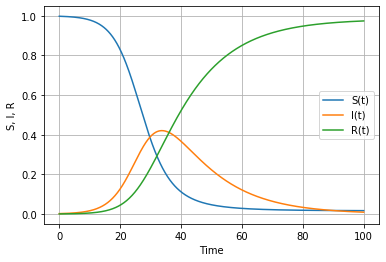

In [4]:
plt.plot(t, solved_system[:, 0], label = 'S(t)')
plt.plot(t, solved_system[:, 1], label = 'I(t)')
plt.plot(t, solved_system[:, 2], label = 'R(t)')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('S, I, R')